In [ ]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Read in data as .csv file

file_loc = os.getcwd() + "/ppo_training_logs/training_log_SpaceInvaders.csv"
print(file_loc)
log_file = pd.read_csv(filepath_or_buffer= file_loc, header= None, index_col= None, names= ["Epoch", "Score", "Duration"])

In [ ]:
# Have the epoch numver continually incrementing, remove the resets

addition = 0
diff = 0
for i in range(len(log_file) - 1):
    if((log_file.iloc[(i + 1),0] - log_file.iloc[i,0]) < 0):
        diff = log_file.iloc[i,0]

    log_file.iloc[i,0] += addition
    addition += diff
    diff = 0
log_file.iloc[(len(log_file) - 1),0] += addition

np_data = log_file.to_numpy()

In [ ]:
log_file

In [50]:
chunks = np.array_split(np_data, 50)
chunked_data = np.zeros((5, len(chunks)))


for i in range(len(chunks)):
    chunked_data[:,i] = np.append(chunks[i][-1,0], np.append(np.mean(chunks[i][:,1:], 0), np.std(chunks[i][:,1:], 0)) )
chunked_data = np.transpose(chunked_data)    

In [51]:
pd.DataFrame(chunked_data)

,0,1,2,3,4
0,116472.0,220.931864,2.924893,94.989628,0.539084
1,232733.0,188.336673,4.274318,64.585458,0.884157
2,351684.0,218.086172,4.468675,70.414565,0.799270
3,471798.0,245.681363,4.535475,73.189138,0.633407
4,591813.0,255.671343,4.496568,51.256753,0.377535
5,708737.0,224.388778,4.321904,74.933352,0.583631
6,832632.0,256.262525,4.574831,65.918888,0.726378
7,961684.0,284.719439,4.846129,100.810451,1.006134
8,1085637.0,283.186373,4.673886,92.507202,0.783346
9,1203220.0,275.731463,4.416819,109.211585,1.002709


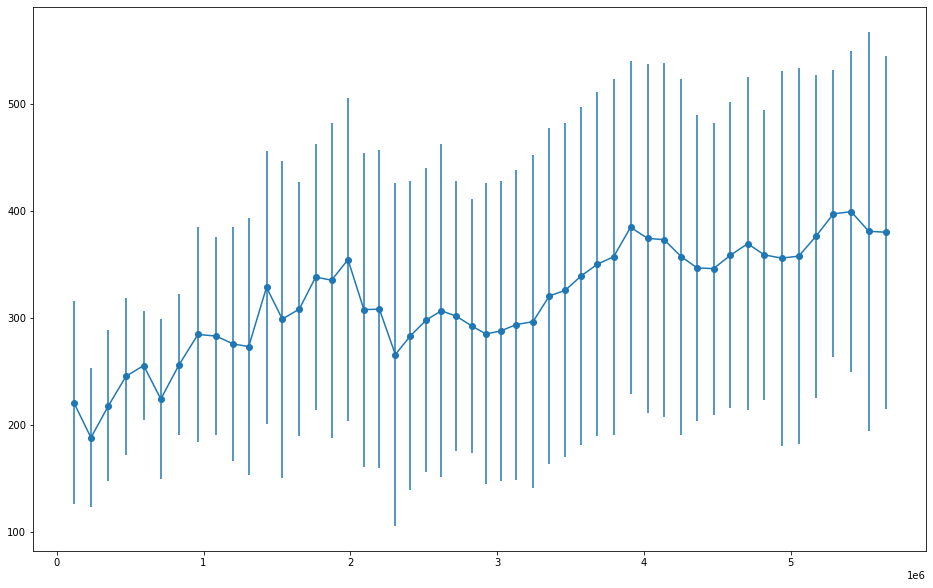

In [77]:
# Plotting the Score

fig, ax = plt.subplots(figsize = (16,10))
ax.errorbar(chunked_data[:,0], chunked_data[:,1], xerr=0, yerr=chunked_data[:,3], fmt='-o')
plt.show()

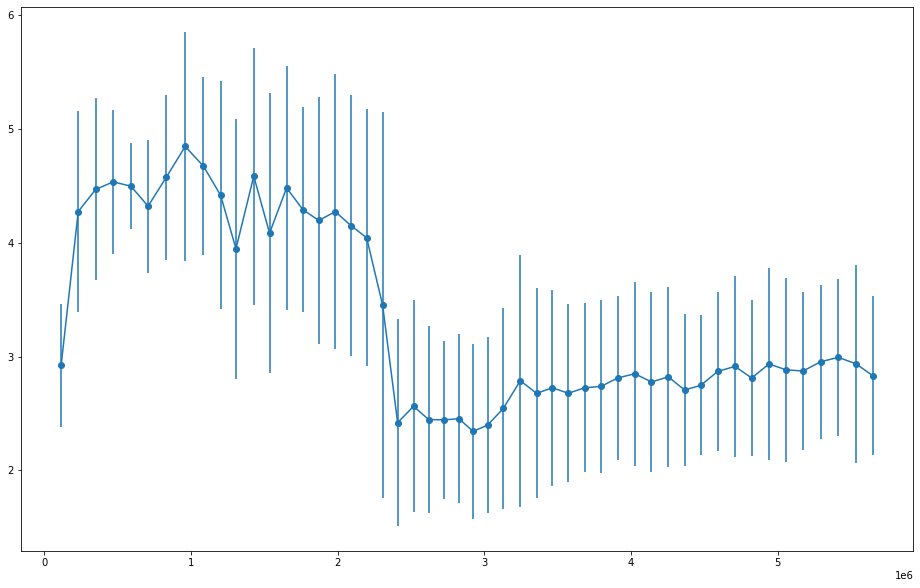

In [78]:
# Plotting the game duration

fig, ax = plt.subplots(figsize = (16,10))
ax.errorbar(chunked_data[:,0], chunked_data[:,2], xerr=0, yerr=chunked_data[:,4], fmt='-o')
plt.show()